In [1]:
%matplotlib widget
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
#from rt2_assignment1.msg import Sim
from nav_msgs.msg import Odometry
import time
from matplotlib import animation, rc
from actionlib_msgs.msg import GoalStatusArray
from geometry_msgs.msg import Twist
import ipywidgets as widgets
from std_msgs.msg import String, Int32MultiArray
import rospy
import math
# Simulation 1:
sim_flag = "off"


# Initializing rosnode.
rospy.init_node('robot_control_node')
pub1 = rospy.Publisher('user_interface_sig', String, queue_size=10)
    

start_button = widgets.Button(description="Start!")
stop_button = widgets.Button(description="Stop!")
output = widgets.Text(value="Click 'Start' Button to start the simulation.",disabled=True)

def on_start_button_clicked(b):
    global sim_flag
    output.value = 'Simulation Start!'
    pub1.publish("1")
    sim_flag = "on"
        
def on_stop_button_clicked(b):
    global sim_flag
    output.value = 'Simulation Stop!'
    pub1.publish("0")
    sim_flag = "off"


start_button.on_click(on_start_button_clicked)
stop_button.on_click(on_stop_button_clicked)

widgets.HBox([widgets.VBox([start_button, stop_button]), output])


In [2]:
from IPython.display import display

pub = rospy.Publisher('control_speed', Twist, queue_size=10)

msg = Twist()

a = widgets.FloatSlider(min=0.0, max=1.0)
display(a)

b = widgets.FloatSlider(min=0.0, max=1.0)
display(b)


def on_value_change(change):
    global msg
    msg.linear.x = change['new']
    output.value = 'Simulation Start!'
    pub.publish(msg)
    
def on_valueang_change(change):
    global msg
    msg.angular.z = change['new']
    pub.publish(msg)

a.observe(on_value_change, names='value')
b.observe(on_valueang_change, names='value')

FloatSlider(value=0.0, max=1.0)

FloatSlider(value=0.0, max=1.0)

In [3]:
pub2 = rospy.Publisher('/cmd_vel', Twist, queue_size=1)
    
msg2 = Twist()
    
f_button = widgets.Button(description="Forward!")
r_button = widgets.Button(description="Right!")
l_button = widgets.Button(description="Left!")
b_button = widgets.Button(description="Backward!")
s_button = widgets.Button(description="Stop!")
output1 = widgets.Text(value="Click Buttons to control the robot.", disabled=True)

def on_f_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.linear.x = 0.5
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Forward!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
        
def on_r_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.angular.z = 0.5
    pub2.publish(msg2)
    output1.value = 'Right!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'

def on_l_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
        
    msg2.angular.z = -0.5
    pub2.publish(msg2)
    output1.value = 'Left'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
    
def on_b_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
    
    msg2.linear.x = -0.5
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Backward!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'

    
def on_s_button_clicked(b):
    global sim_flag
    global msg2
    
    if (sim_flag == "on"):
        output1.value = 'Stop Simulation1!'
        pub1.publish("0")
        sim_flag = "off"
        
    msg2.linear.x = 0.0
    msg2.angular.z = 0.0
    pub2.publish(msg2)
    output1.value = 'Stop!'
    time.sleep(1)
    output1.value = 'Click Buttons to control the robot.'
    
f_button.on_click(on_f_button_clicked)
r_button.on_click(on_r_button_clicked)
l_button.on_click(on_l_button_clicked)
b_button.on_click(on_b_button_clicked)
s_button.on_click(on_s_button_clicked)

widgets.HBox([l_button, widgets.VBox([f_button, b_button]), r_button, s_button, output1])

In [4]:
%matplotlib widget
# First set up the figure and the axis 
fig3, ax3 = plt.subplots()

ax3.set_xlim(( -5, 5))
ax3.set_ylim((-5, 5))

line, = ax3.plot([], [], 'ro')
x_data=[]
y_data=[]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
#from nav_msgs.msg import Odometry

def init():
    line.set_data([], [])
    return (line,)


def odom_callback(msg):
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)

def animate(i):
    line.set_data(x_data, y_data)
    return (line,)


sub1 = rospy.Subscriber('/odom', Odometry, odom_callback)

In [6]:
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig3, animate, init_func=init,
                               frames=100, interval=20, blit=True)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

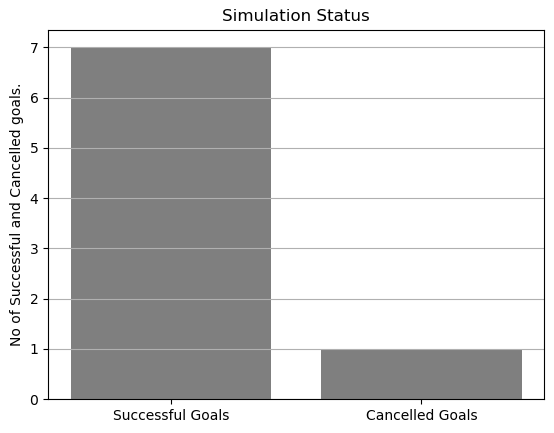

In [7]:
from IPython import display

no_of_succ_goals = 0
no_of_cancel_goals = 0

# Build the plot
fig1, ax1 = plt.subplots()
hdisplay1 = display.display("", display_id=True)


def succ_status_callback(msg):
        num = int(msg.data)
        s = "succ"
        pltsin1(num,s)

def cancel_status_callback(msg):      
        num = int(msg.data)
        s = "can"
        pltsin1(num,s)
                
def pltsin1(n,c):
    global no_of_succ_goals
    global no_of_cancel_goals
    
    if(c == "succ"):
        no_of_succ_goals = n
    else:
        no_of_cancel_goals = n
        
    items = ['Successful Goals', 'Cancelled Goals']
    x_pos = np.arange(len(items))
    CTEs = [no_of_succ_goals, no_of_cancel_goals]
    ax1.set_ylabel('No of Successful and Cancelled goals.')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(items)
    ax1.set_title('Simulation Status')
    ax1.bar(x_pos, CTEs, align='center', alpha=1.0)
    ax1.yaxis.grid(True)
    hdisplay1.update(fig1)
    
    
sub2 = rospy.Subscriber('/success_goals', String, succ_status_callback)
sub3 = rospy.Subscriber('/cancel_goals', String, cancel_status_callback)


plt.close(fig1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

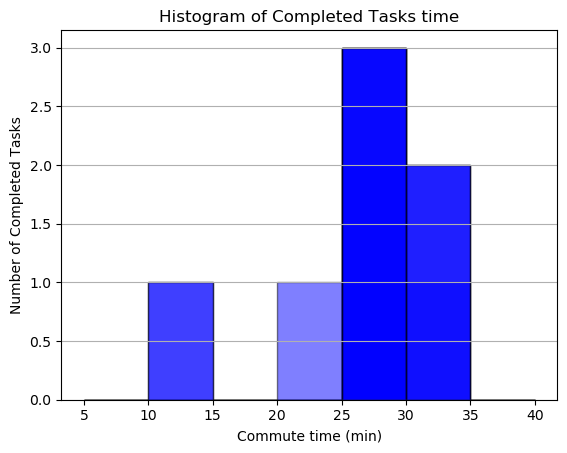

In [8]:
import math

output_sim1 = widgets.Text(value="Time",disabled=True)
output_sim2 = widgets.Text(value="Time",disabled=True)

#time_taken_array = []
# Build the plot
fig2, ax2 = plt.subplots()
hdisplay2 = display.display("", display_id=True)

def callback_time_taken(msg):
    output_sim1.value = str(msg.data[0])
    bin_edges = [5,10,15,20,25,30,35,40]
    ax2.set_xlabel('Commute time (min)')
    ax2.set_ylabel('Number of Completed Tasks')
    ax2.set_xticks([5,10,15,20,25,30,35,40])
    ax2.set_title('Histogram of Completed Tasks time')
    ax2.hist(msg.data, bins=bin_edges, density=False, histtype='bar', color='b', edgecolor='k', alpha=0.5)
    ax2.yaxis.grid(True)
    hdisplay2.update(fig2)
    
    
sub4 = rospy.Subscriber('/task_time', Int32MultiArray, callback_time_taken)

plt.close(fig2)

In [9]:
#%matplotlib inline

#x = [2,2,2,3,1,1,3,4,4,4,4,4,4,5]

#bin_edges = [2,4,6,8,10]
#fig5 = plt.hist(x,
#         bins=bin_edges,
#         density=False,
#         histtype='bar',
#         color='b',
#         edgecolor='k',
#         alpha=0.5)

#plt.xlabel('Commute time (min)')
#plt.xticks([2,4,6,8,10])
#plt.ylabel('Number of Completed Tasks')
#plt.title('Histogram of Completed Tasks time')

#plt.show(fig5)

widgets.VBox([output_sim1])